In [ ]:
pip install boto3
pip install matplotlib

In [9]:
! pip install boto3
! pip install base64

ERROR: Could not find a version that satisfies the requirement base64 (from versions: none)
ERROR: No matching distribution found for base64


(np.float64(-0.5), np.float64(275.5), np.float64(182.5), np.float64(-0.5))

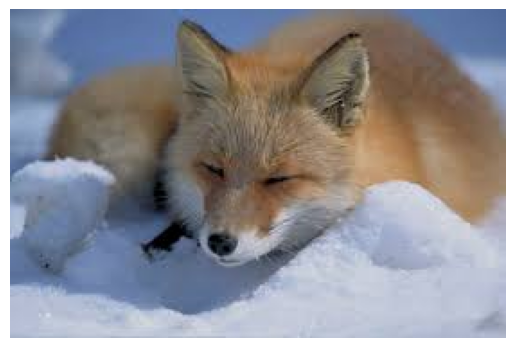

In [2]:
import matplotlib.pyplot as plt

img = plt.imread('./images/fox.png')

plt.imshow(img)
plt.axis('off')

In [12]:
import boto3
import base64

rekognition = boto3.client(
    'rekognition',
    aws_access_key_id='',
    aws_secret_access_key='',
    region_name=''
)

# with : 파일이 열고 닫히는 것을 자동으로 관리해주는 역할
# => 파일작업중에 예외가 발생해도 안전하게 닫아준다.
# rb : binary 모드로 읽겠다는 의미

with open ('./images/fox.png','rb') as cf:

    # AWS Rekognition으로 전송하기 위해 바이너리 데이터로 전처리    
    base64_image = base64.b64encode(cf.read()) # 인코딩
    base64_binary = base64.decodebytes(base64_image) # 디코딩
    print("file open!")
    
response = rekognition.detect_labels(Image={'Bytes' : base64_binary})
    
response
    


file open!


{'Labels': [{'Name': 'Animal',
   'Confidence': 96.1859130859375,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Fox',
   'Confidence': 96.1859130859375,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}, {'Name': 'Mammal'}, {'Name': 'Wildlife'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Mammal',
   'Confidence': 96.1859130859375,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Wildlife',
   'Confidence': 96.1859130859375,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Canine',
   'Confidence': 95.57061767578125,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}, {'Name': 'Mammal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Kit Fox',
   'Confidence': 95.5706